In [50]:
# dependencies

import requests
import json
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import gmaps
from config import gkey
import matplotlib.pyplot as plt

In [2]:
#m-media api has live & historical case data 
# sample live data request 

#{
#   "All": {
#     "confirmed": 2604595,
#     "recovered": 195365,
#     "deaths": 62548,
#     "country": "France",
#     "population": 64979548,
#     "sq_km_area": 551500,
#     "life_expectancy": "78.8",
#     "elevation_in_meters": 375,
#     "continent": "Europe",
#     "abbreviation": "FR",
#     "location": "Western Europe",
#     "iso": 250,
#     "capital_city": "Paris",
#     "lat": "46.2276",
#     "long": "2.2137",
#     "updated": "2020/12/26 12:21:56+00"
#   },
#   "French Guiana": {
#     "lat": "4",
#     "long": "-53",
#     "confirmed": 12685,
#     "recovered": 9995,
#     "deaths": 71,
#     "updated": "2020/12/26 12:21:56+00"
#   },
#   ...
# }

In [3]:
# confirmed vs recovered cases
# confirmed vs deaths
# population vs confirmed cases
# population density vs confirmed cases
# population vs deaths
# filter by location/region/country 
# death rate per capita v life expectancy


In [4]:
url = "https://covid-api.mmediagroup.fr/v1/cases?"

In [5]:
print(requests.get(url))

<Response [200]>


In [6]:
# pprint(requests.get(url).json())

In [7]:
continent = "North America"
query_url = url + "continent=" + continent

data_response = requests.get(query_url)
data_json = data_response.json()
data_json

{'Antigua and Barbuda': {'All': {'confirmed': 1232,
   'recovered': 1014,
   'deaths': 32,
   'country': 'Antigua and Barbuda',
   'population': 102012,
   'sq_km_area': 442,
   'life_expectancy': '70.5',
   'elevation_in_meters': None,
   'continent': 'North America',
   'abbreviation': 'AG',
   'location': 'Caribbean',
   'iso': 28,
   'capital_city': "Saint John's",
   'lat': '17.0608',
   'long': '-61.7964',
   'updated': '2021/05/01 15:20:41+00'}},
 'Bahamas': {'All': {'confirmed': 10453,
   'recovered': 9494,
   'deaths': 199,
   'country': 'Bahamas',
   'population': 395361,
   'sq_km_area': 13878,
   'life_expectancy': '71.1',
   'elevation_in_meters': None,
   'continent': 'North America',
   'abbreviation': 'BS',
   'location': 'Caribbean',
   'iso': 44,
   'capital_city': 'Nassau',
   'lat': '25.025885',
   'long': '-78.035889',
   'updated': '2021/05/01 15:20:41+00'}},
 'Barbados': {'All': {'confirmed': 3863,
   'recovered': 3783,
   'deaths': 44,
   'country': 'Barbados',


In [10]:
import json


# na_countries = ["Canada", "US", "Mexico"]
All = []

# for country in na_countries:
target_url = query_url 
response = requests.get(query_url).json()
    
#     country.append(response["All"]['country'])
#     confirmed.append(response["All"]['confirmed'])
#     pprint((response[0]["ALL"]['country']))
for key,value in response.items():
    All.append(value['All'])
# pprint(All)
    
#convert ALL array into a DF
df = pd.DataFrame(All)
df.head()

,confirmed,recovered,deaths,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,lat,long,updated
0,1232,1014,32,Antigua and Barbuda,102012,442,70.5,None,North America,AG,Caribbean,28,Saint John's,17.0608,-61.7964,2021/05/01 15:20:41+00
1,10453,9494,199,Bahamas,395361,13878,71.1,None,North America,BS,Caribbean,44,Nassau,25.025885,-78.035889,2021/05/01 15:20:41+00
2,3863,3783,44,Barbados,285719,430,73,None,North America,BB,Caribbean,52,Bridgetown,13.1939,-59.5432,2021/05/01 15:20:41+00
3,12668,12218,323,Belize,374681,22696,70.9,173,North America,BZ,Central America,84,Belmopan,17.1899,-88.4976,2021/05/01 15:20:41+00
4,1229280,1126295,24226,Canada,36624199,9970610,79.4,487,North America,CA,North America,124,Ottawa,NaN,NaN,NaN


#### start of grant's data cleanup 
1. drop unneeded columns 
2. look for blank or NA values 
3. groupby by Country 
  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   confirmed            23 non-null     int64 
 1   recovered            23 non-null     int64 
 2   deaths               23 non-null     int64 
 3   country              23 non-null     object
 4   population           23 non-null     int64 
 5   sq_km_area           23 non-null     int64 
 6   life_expectancy      23 non-null     object
 7   elevation_in_meters  15 non-null     object
 8   continent            23 non-null     object
 9   abbreviation         23 non-null     object
 10  location             23 non-null     object
 11  iso                  23 non-null     int64 
 12  capital_city         23 non-null     object
 13  lat                  21 non-null     object
 14  long                 21 non-null     object
 15  updated              20 non-null     object
dtypes: int64(6

In [17]:
# new dataframe with kept columns 
columns_to_keep = [
    'country',
    'confirmed',
#     'recovered',
    'deaths',
    'population',
    'sq_km_area',
    'life_expectancy'

    ]
new_df = df[columns_to_keep]
new_df

,country,confirmed,deaths,population,sq_km_area,life_expectancy
0,Antigua and Barbuda,1232,32,102012,442,70.5
1,Bahamas,10453,199,395361,13878,71.1
2,Barbados,3863,44,285719,430,73
3,Belize,12668,323,374681,22696,70.9
4,Canada,1229280,24226,36624199,9970610,79.4
5,Costa Rica,250991,3231,4905769,51100,75.8
6,Cuba,106707,644,11484636,110861,76.2
7,Dominica,174,0,73925,751,73.4
8,Dominican Republic,266561,3480,10766998,48511,73.2
9,El Salvador,69198,2124,6377853,21041,69.7


In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          23 non-null     object
 1   confirmed        23 non-null     int64 
 2   deaths           23 non-null     int64 
 3   population       23 non-null     int64 
 4   sq_km_area       23 non-null     int64 
 5   life_expectancy  23 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.2+ KB


In [19]:
clean_df = new_df.copy()

In [20]:
clean_df['Population Density'] = new_df['population'] / new_df['sq_km_area']
clean_df

,country,confirmed,deaths,population,sq_km_area,life_expectancy,Population Density
0,Antigua and Barbuda,1232,32,102012,442,70.5,230.796380
1,Bahamas,10453,199,395361,13878,71.1,28.488327
2,Barbados,3863,44,285719,430,73,664.462791
3,Belize,12668,323,374681,22696,70.9,16.508680
4,Canada,1229280,24226,36624199,9970610,79.4,3.673215
5,Costa Rica,250991,3231,4905769,51100,75.8,96.003307
6,Cuba,106707,644,11484636,110861,76.2,103.594916
7,Dominica,174,0,73925,751,73.4,98.435419
8,Dominican Republic,266561,3480,10766998,48511,73.2,221.949620
9,El Salvador,69198,2124,6377853,21041,69.7,303.115489


#### start of grant's data visualization 

* create a bar chart by country of our variables 
* confirmed vs deaths
* population vs confirmed cases
* population density vs confirmed cases
* population vs deaths
* filter by location/region/country 
* death rate per capita v life expectancy
* create gmaps heat map for mortality rate
* create gmaps 

In [59]:
clean_df['Confirmed Per Capita'] = new_df['confirmed'] / new_df['population']
clean_df['Deaths Per Capita'] = new_df['deaths'] / new_df['population']
clean_df['Mortality Rate'] = new_df['deaths'] / new_df['confirmed']
clean_df['life_expectancy'] = clean_df['life_expectancy'].apply(float)
clean_df
                                                               

,country,confirmed,deaths,population,sq_km_area,life_expectancy,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate
0,Antigua and Barbuda,1232,32,102012,442,70.5,230.796380,0.012077,0.000314,0.025974
1,Bahamas,10453,199,395361,13878,71.1,28.488327,0.026439,0.000503,0.019038
2,Barbados,3863,44,285719,430,73.0,664.462791,0.013520,0.000154,0.011390
3,Belize,12668,323,374681,22696,70.9,16.508680,0.033810,0.000862,0.025497
4,Canada,1229280,24226,36624199,9970610,79.4,3.673215,0.033565,0.000661,0.019707
5,Costa Rica,250991,3231,4905769,51100,75.8,96.003307,0.051162,0.000659,0.012873
6,Cuba,106707,644,11484636,110861,76.2,103.594916,0.009291,0.000056,0.006035
7,Dominica,174,0,73925,751,73.4,98.435419,0.002354,0.000000,0.000000
8,Dominican Republic,266561,3480,10766998,48511,73.2,221.949620,0.024757,0.000323,0.013055
9,El Salvador,69198,2124,6377853,21041,69.7,303.115489,0.010850,0.000333,0.030695


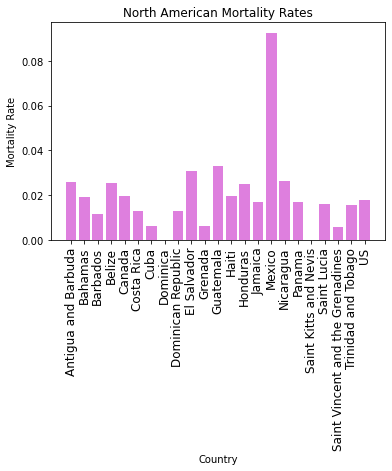

In [60]:
# Mortality Rates by Country
x_axis = clean_df['country']
y_axis = clean_df['Mortality Rate']
plt.bar(x_axis, y_axis, color='m', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 90, fontsize = 12)
plt.title('North American Mortality Rates')
plt.ylabel('Mortality Rate')
plt.xlabel('Country')
plt.show()

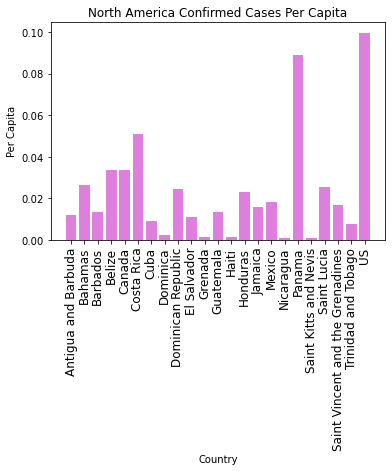

In [51]:
# Confirmed per Capita by Country
x_axis = clean_df['country']
y_axis = clean_df['Confirmed Per Capita']
plt.bar(x_axis, y_axis, color='m', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 90, fontsize = 12)
plt.title('North America Confirmed Cases Per Capita')
plt.ylabel('Per Capita')
plt.xlabel('Country')
plt.show()

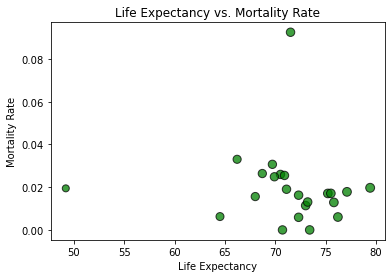

In [63]:
# Scatter Plot of Life Expectancy and Mortality Rate
x_axis = clean_df['life_expectancy']
y_axis = clean_df['Mortality Rate']
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.ylabel('Mortality Rate')
plt.xlabel('Life Expectancy')
plt.title('Life Expectancy vs. Mortality Rate')
plt.show()

In [57]:
clean_df.dtypes

country                  object
confirmed                 int64
deaths                    int64
population                int64
sq_km_area                int64
life_expectancy          object
Population Density      float64
Confirmed Per Capita    float64
Deaths Per Capita       float64
Mortality Rate          float64
dtype: object

In [ ]:
# Scatter Plot of Population Density and Confirmed Per Capita

In [ ]:
# Scatter Plot of Population Density and Mortality Rate

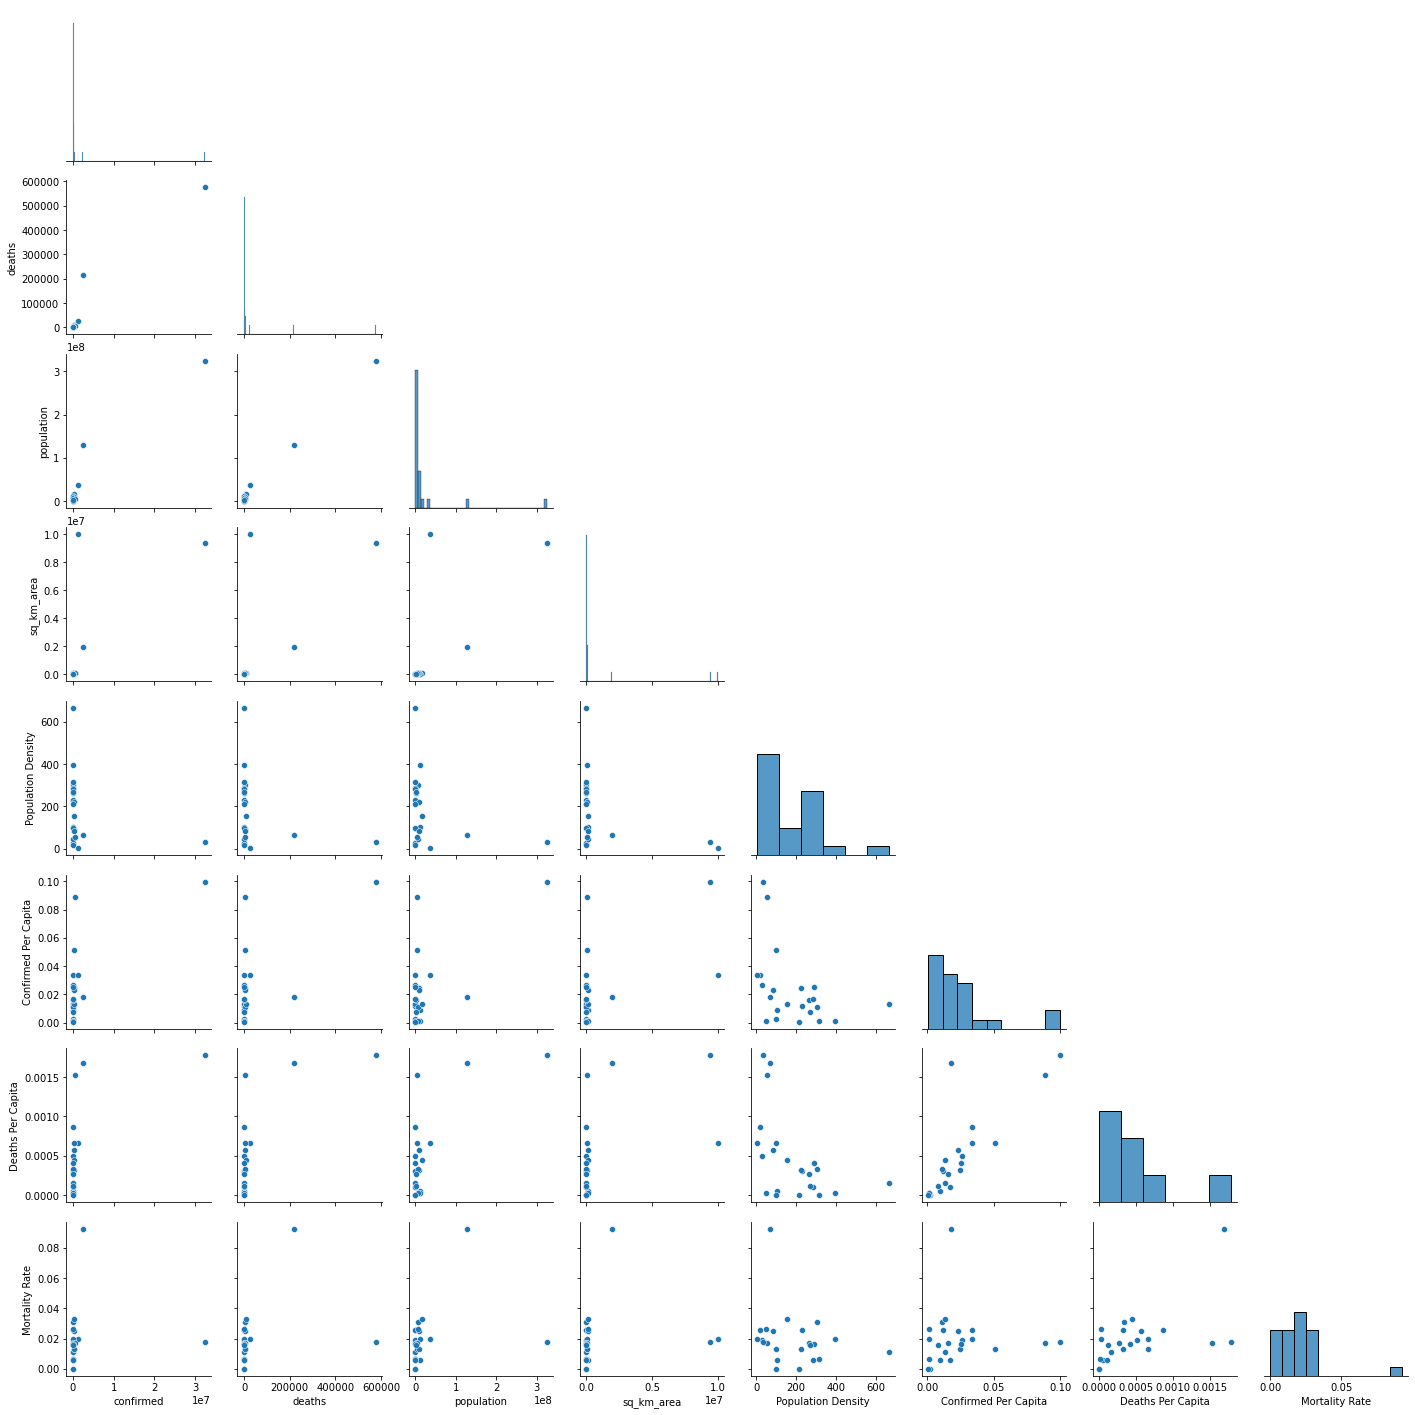

In [25]:
g = sns.pairplot(clean_df, corner=True)  
# g.map_lower()
plt.show()